In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [6]:
X,_ = make_blobs( centers=3,random_state=42 )

In [13]:
import seaborn as sns


c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

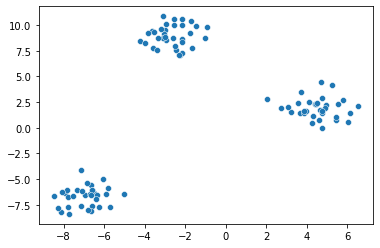

In [14]:
sns.scatterplot(X[:,0],X[:,-1])

In [45]:
model = KMeans(n_clusters=4)

In [46]:
model.fit(X)

KMeans(n_clusters=4)

In [47]:
y_gen = model.labels_

In [48]:
y_gen

array([0, 2, 1, 2, 0, 2, 1, 2, 2, 3, 3, 0, 0, 3, 1, 0, 0, 1, 0, 0, 3, 0,
       0, 1, 1, 1, 2, 0, 0, 0, 0, 2, 2, 0, 1, 3, 3, 3, 2, 2, 0, 3, 2, 3,
       3, 2, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 3, 3, 2, 3, 0, 2, 0, 2, 0, 0,
       2, 0, 2, 2, 2, 0, 0, 3, 2, 0, 2, 0, 2, 2, 3, 2, 3, 0, 3, 3, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 1, 1, 2, 0, 3])

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

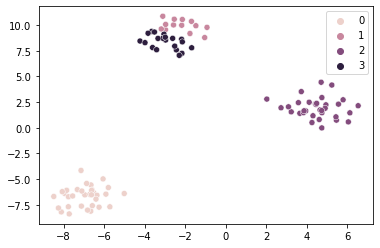

In [49]:
sns.scatterplot(X[:,0],X[:,-1] , hue = y_gen)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


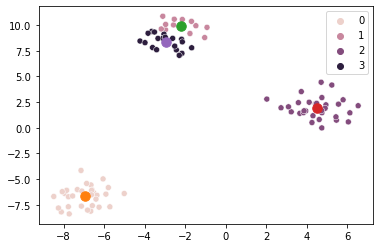

In [50]:

sns.scatterplot(X[:,0],X[:,-1] , hue = y_gen)



for center in model.cluster_centers_:
    plt.scatter(center[0],center[1],s=90)

In [79]:
import random
import numpy as np

## Custom KMeans

In [80]:
class Cluster:
    
    def __init__(self, center):
        self.center = center
        self.points = []
    
    def distance(self, point):
        return np.sqrt(np.sum((point - self.center) ** 2))
        

class CustomKMeans:
    
    def __init__(self, n_clusters=3, max_iters=20):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
    
    def fit(self, X):
        
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center=random.choice(X))
            clusters.append(cluster)
            
        
        
        for i in range(self.max_iters):
            
            labels = []
        
            # going for each point
            for point in X:

                # collecting disctances form every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                # finding closest cluster
                closest_idx = np.argmin(distances)
                closest_cluster = clusters[closest_idx]
                closest_cluster.points.append(point)
                labels.append(closest_idx)

            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis=0)
            
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]
        
            
        
        
        

In [81]:
model = CustomKMeans(n_clusters=2)

model.fit(X)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

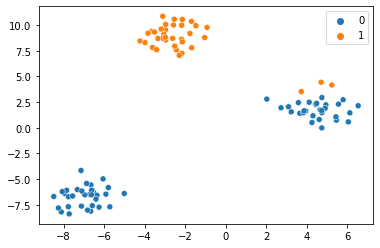

In [82]:
sns.scatterplot(X[:, 0], X[:, 1], hue=model.labels_)